In [372]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Task 1:

In [262]:
data1 = pd.read_csv('dataset2/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
data1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [264]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [266]:
data1.Diabetes_binary.value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

In [268]:
data1.shape

(70692, 22)

In [270]:
x = data1.iloc[:, 2:]
y = data1.iloc[:, 0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

dt_gini = DecisionTreeClassifier(criterion='gini')
training = dt_gini.fit(x_train, y_train)
y_pred = dt_gini.predict(x_test)

print(f"Gini(without pruning):\nTraining accuracy: {(dt_gini.score(x_train, y_train)) * 100 : .4f}%")
print(f"Testing accuracy: {(accuracy_score(y_test, y_pred)) * 100 :.4f}%")

Gini(without pruning):
Training accuracy:  99.2397%
Testing accuracy: 65.2663%


In [272]:
dt_gini_prune = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)
training = dt_gini_prune.fit(x_train, y_train)
y_pred = dt_gini_prune.predict(x_test)

print(f"Gini(with pruning):\nTraining accuracy: {(dt_gini_prune.score(x_train, y_train)) * 100 : .4f}%")
print(f"Testing accuracy: {(accuracy_score(y_test, y_pred)) * 100 :.4f}%")

Gini(with pruning):
Training accuracy:  68.5675%
Testing accuracy: 68.4702%


In [273]:
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(x_train, y_train)
y_pred = dt_entropy.predict(x_test)

print(f"Entropy(without pruning):\nTraining accuracy: {(dt_entropy.score(x_train, y_train)) * 100 : .4f}%")
print(f"Testing accuracy: {(accuracy_score(y_test, y_pred)) * 100 :.4f}%")

Entropy(without pruning):
Training accuracy:  99.2397%
Testing accuracy: 65.6411%


In [276]:
dt_entropy_prune = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
dt_entropy_prune.fit(x_train, y_train)
y_pred = dt_entropy_prune.predict(x_test)

print(f"Entropy(with pruning):\nTraining accuracy: {(dt_entropy_prune.score(x_train, y_train)) * 100 : .4f}%")
print(f"Testing accuracy: {(accuracy_score(y_test, y_pred)) * 100 :.4f}%")

Entropy(with pruning):
Training accuracy:  68.5675%
Testing accuracy: 68.4702%


In [278]:
data2 = pd.read_csv('spotify-dataset/spotify_churn_dataset.csv')
data2.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [280]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [282]:
data2.shape

(8000, 12)

In [284]:
data2.isna().sum()
data2.duplicated().sum()

0

In [310]:
x = data2.iloc[:, :-1]
y = data2.iloc[:, -1]

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in ['gender', 'country', 'subscription_type', 'device_type']:
    x[column] = le.fit_transform(x[column])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

dt_gini = DecisionTreeClassifier(criterion='gini')
training = dt_gini.fit(x_train, y_train)
y_pred = dt_gini.predict(x_test)

print(f"Gini(without pruning):\nTraining accuracy: {(dt_gini.score(x_train, y_train)) * 100 : .4f}%")
print(f"Testing accuracy: {(accuracy_score(y_test, y_pred)) * 100 :.4f}%")

Gini(without pruning):
Training accuracy:  100.0000%
Testing accuracy: 62.3750%


In [312]:
dt_gini_prune = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)
training = dt_gini_prune.fit(x_train, y_train)
y_pred = dt_gini_prune.predict(x_test)

print(f"Gini(with pruning):\nTraining accuracy: {(dt_gini_prune.score(x_train, y_train)) * 100 : .4f}%")
print(f"Testing accuracy: {(accuracy_score(y_test, y_pred)) * 100 :.4f}%")

Gini(with pruning):
Training accuracy:  73.8906%
Testing accuracy: 75.0000%


In [314]:
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(x_train, y_train)
y_pred = dt_entropy.predict(x_test)

print(f"Entropy(without pruning):\nTraining accuracy: {(dt_entropy.score(x_train, y_train)) * 100 : .4f}%")
print(f"Testing accuracy: {(accuracy_score(y_test, y_pred)) * 100 :.4f}%")
print(dt_entropy.n_features_in_)
print(x_train.columns.tolist())

Entropy(without pruning):
Training accuracy:  100.0000%
Testing accuracy: 62.8125%
11
['user_id', 'gender', 'age', 'country', 'subscription_type', 'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type', 'ads_listened_per_week', 'offline_listening']


In [316]:
dt_entropy_prune = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
dt_entropy_prune.fit(x_train, y_train)
y_pred = dt_entropy_prune.predict(x_test)

print(f"Entropy(with pruning):\nTraining accuracy: {(dt_entropy_prune.score(x_train, y_train)) * 100 : .4f}%")
print(f"Testing accuracy: {(accuracy_score(y_test, y_pred)) * 100 :.4f}%")

Entropy(with pruning):
Training accuracy:  73.8906%
Testing accuracy: 75.0000%


In [324]:
from sklearn import tree
import graphviz

fn = ['user_id', 'gender', 'age', 'country', 'subscription_type',
       'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening']

print("Number of features in model:", dt_entropy.n_features_in_)
print("Number of names provided:", len(fn))

dot_data = tree.export_graphviz(
    dt_entropy,                      # your trained DecisionTreeClassifier
    feature_names=fn,        # list of feature names (e.g., ['age','chol'])
    filled=True,             # fill nodes with colors
    rounded=True,            # round node boxes
    special_characters=True  # handle spaces/symbols in labels
)

graph = graphviz.Source(dot_data)
graph

#this didnt work cuz apparently i will have to downalod some other stuff for this to work and there aint any time now so will do it later

Number of features in model: 11
Number of names provided: 11


## Task 2

In [157]:
import numpy as np
from collections import Counter

In [401]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*, value=None):
        self.feature = feature
        self.threshold = threshold
        self.right = right
        self.left = left
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self. n_features = n_features
        self.root = None

    def fit(self, x, y):
        x = np.array(x) if not isinstance(x, np.ndarray) else x
        y = np.array(y) if not isinstance(y, np.ndarray) else y
        
        self.n_features = x.shape[1] if not self.n_features else min(x.shape[1], self.n_features)
        self.root = self.grow_tree(x, y)

    def grow_tree(self, X, y, depth=0):
        n_samples, n_feat = X.shape
        n_labels = len(np.unique(y))
        
        #stopping condition
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common(y)
            return Node(value = leaf_value)

        features_indexes = np.random.choice(a=n_feat, size=self.n_features, replace=False)

        #find the best split
        best_feature, best_threshold = self.best_split(X, y, features_indexes)

        #create child nodes
        left_index, right_index = self._split(X[:, best_feature], best_threshold)
        left = self.grow_tree(X[left_index, :], y[left_index], depth+1)
        right = self.grow_tree(X[right_index, :], y[right_index], depth+1)
        return Node(best_feature, best_threshold, left, right)

    def best_split(self, X, y, feat_idxs):
        best_gain = -1.0
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                #calculate info gain
                gain = self.info_gain(y, X_column, thr)
                if gain > best_gain:
                    best_gain = gain
                    split_idx=feat_idx
                    split_threshold = thr
                    
        return split_idx, split_threshold

    def info_gain(self, y, X_column, threshold):
        #parent entropy
        parent_entropy = self.entropy(y)

        #create children
        left_index, right_index = self._split(X_column, threshold)

        if len(left_index) == 0 or len(right_index) == 0:
            return 0

        #children weighted entropy
        n = len(y)
        n_l, n_r = len(left_index), len(right_index)
        e_l, e_r = self.entropy(y[left_index]), self.entropy(y[right_index])
        child_entropy = (n_l/n)*e_l + (n_r/n)*e_r

        #return info gain
        information_gain=parent_entropy - child_entropy
        return information_gain
    '''
    def entropy(self, y):
        counts = Count(y)
        total = len(y)
        entropy_ = 0.0
        for c in counts:
            p = c/total
            if p > 0:
                entropy_ -= p*np.log2(p)
        return entropy_
    '''
    
    def entropy(self, y):
        hist = np.bincount(y)
        ps = hist/len(y)
        return -np.sum([p*np.log2(p) for p in ps if p > 0])
    
                
        
    def _split(split, X_column, threshold):
        if isinstance(X_column, (int, float)):
            left_idxs = np.argwhere(X_column <= threshold).flatten()
            right_idxs = np.argwhere(X_column > threshold).flatten()
        else:
            left_idxs = np.argwhere(X_column == threshold).flatten()
            right_idxs = np.argwhere(X_column != threshold).flatten()
        return left_idxs, right_idxs

    def _most_common(self, y):
        return Counter(y).most_common(1)[0][0]
    
    def predict(self, test):
        test = np.array(test) if not isinstance(test, np.ndarray) else test
        return np.array([self.traverse_tree(x, self.root) for x in test])

    def traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        feature_value = x[node.feature]

        if isinstance(feature_value, (int, float)):
            if x[node.feature] <= node.threshold:
                return self.traverse_tree(x, node.left)
            return self.traverse_tree(x, node.right)

        else:
            if feature_value == node.threshold:
                return self.traverse_tree(x, node.left)
            else:
                return self.traverse_tree(x, node.right)

def print_tree(node, depth=0):
        indent = "  " * depth   # indentation for tree levels
        if node.is_leaf_node():
            print(f"{indent}Leaf: Predict -> {node.value}")
        else:
            print(f"{indent}[X{node.feature} <= {node.threshold}]")
            print(f"{indent}--> True:")
            print_tree(node.left, depth + 1)
            print(f"{indent}--> False:")
            print_tree(node.right, depth + 1)


In [386]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

acc = accuracy(y_test, predictions)
print(acc)

0.3684210526315789


In [384]:
dt_data = pd.read_csv('dt_scratch_data.csv')
x = dt_data.iloc[:, :-1]
y = dt_data.iloc[:, -1]

from sklearn.preprocessing import LabelEncoder
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

dt = DecisionTree(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

acc = accuracy(y_test, y_pred)
print(acc)
print(dt.root.value

0.6666666666666666
None


In [235]:
dt_data.head()

,ID,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING,CLASS
0,1,Young,False,False,Fair,No
1,2,Young,False,False,Good,No
2,3,Young,True,False,Good,Yes
3,4,Young,True,True,Fair,Yes
4,5,Young,False,False,Fair,No


## Task 3:

In [336]:
df = pd.read_csv('cancer patient data sets.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [338]:
df.drop(columns=['index', 'Patient Id'], inplace=True)

In [342]:
df.duplicated().sum()

848

In [344]:
df.drop_duplicates(inplace=True)

In [346]:
df.duplicated().sum()

0

In [350]:
df.Level.value_counts() #almost balanced

Level
High      53
Medium    52
Low       47
Name: count, dtype: int64

In [352]:
encoding = {'Low':0, 'Medium':1, 'High':2}
df['Level'] = df['Level'].map(encoding)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


<Axes: >

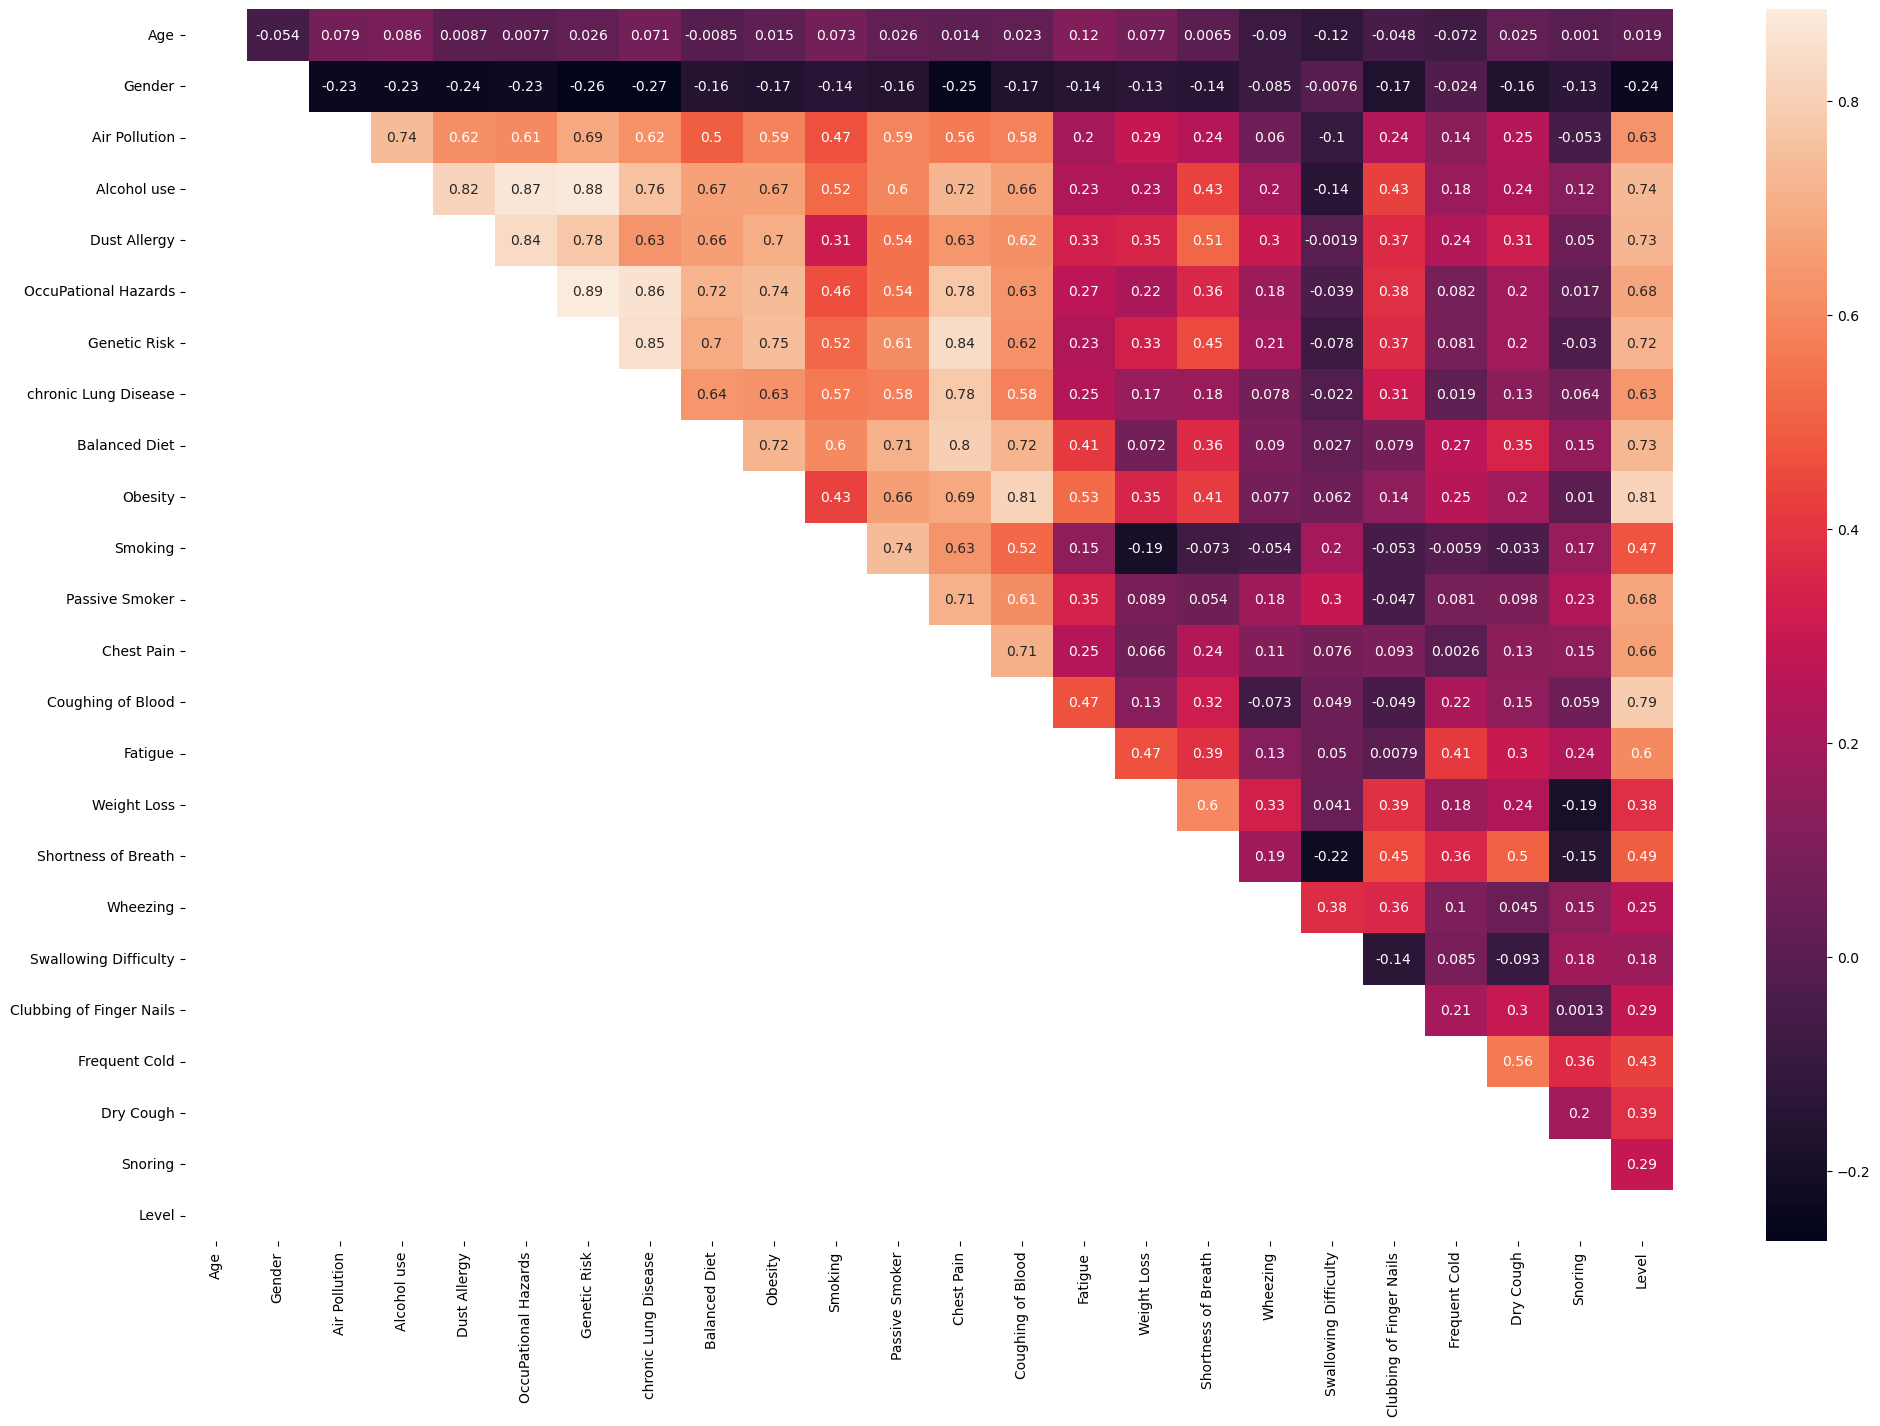

In [360]:
import seaborn as sns
plt.figure(figsize=(24, 16))
corr_matrix = df.corr(numeric_only=True)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
sns.heatmap(upper_tri, annot=True)

In [364]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
df_new = df.drop(columns=to_drop)
df_new.head()

,Age,Gender,Air Pollution,Alcohol use,Balanced Diet,Obesity,Smoking,Passive Smoker,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,2,4,3,2,3,4,2,2,3,1,2,3,4
1,17,1,3,1,2,2,2,4,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,7,2,3,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,7,7,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,8,7,3,2,4,1,4,2,4,2,3


In [376]:

x = df_new.iloc[:, :-1]
y = df_new.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
print(f"80-20 split score: {dt.score(X_test, y_test)}")

# validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
dt.fit(X_train, y_train)

print(f"70-30 split-of-training score: {dt.score(X_test, y_test)}")

80-20 split score: 0.967741935483871
70-30 split-of-training score: 0.918918918918919


## another implementation

In [399]:
import numpy as np
from collections import Counter

# Node class for tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature        # feature index used for split
        self.threshold = threshold    # threshold value for split
        self.left = left              # left child (<= threshold)
        self.right = right            # right child (> threshold)
        self.value = value            # class label if leaf

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, n_features=None):
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        # Ensure X and y are numpy arrays
        X = np.array(X)
        y = np.array(y)

        # number of features to consider
        self.n_features = X.shape[1] if self.n_features is None else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (n_samples < self.min_samples_split) or (n_labels == 1):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # split the dataset
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs])
        right = self._grow_tree(X[right_idxs, :], y[right_idxs])
        return Node(best_feature, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = thr
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, threshold)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p*np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        X = np.array(X)
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

def print_tree(node, depth=0):
        indent = "  " * depth   # indentation for tree levels
        if node.is_leaf_node():
            print(f"{indent}Leaf: Predict -> {node.value}")
        else:
            print(f"{indent}[X{node.feature} <= {node.threshold}]")
            print(f"{indent}--> True:")
            print_tree(node.left, depth + 1)
            print(f"{indent}--> False:")
            print_tree(node.right, depth + 1)



# ------------------------
# Example usage
# ------------------------
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    # Load dataset
    data = datasets.load_iris()
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTree(min_samples_split=3)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)

    acc = np.sum(preds == y_test) / len(y_test)
    print("Accuracy:", acc)

    print_tree(clf.root)


Accuracy: 1.0
[X3 <= 0.6]
--> True:
  Leaf: Predict -> 0
--> False:
  [X2 <= 4.7]
  --> True:
    [X3 <= 1.6]
    --> True:
      Leaf: Predict -> 1
    --> False:
      Leaf: Predict -> 2
  --> False:
    [X3 <= 1.7]
    --> True:
      [X2 <= 4.9]
      --> True:
        Leaf: Predict -> 1
      --> False:
        [X3 <= 1.5]
        --> True:
          Leaf: Predict -> 2
        --> False:
          [X2 <= 5.1]
          --> True:
            Leaf: Predict -> 1
          --> False:
            Leaf: Predict -> 2
    --> False:
      [X2 <= 4.8]
      --> True:
        [X0 <= 5.9]
        --> True:
          Leaf: Predict -> 1
        --> False:
          Leaf: Predict -> 2
      --> False:
        Leaf: Predict -> 2
